In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
d1 = pd.read_csv('/Users/bahareh/Desktop/My_Job/BlochChain/Git/blockchain-dashboards/02_NFT/Raw_Data/01-25.csv', on_bad_lines='skip')
d2 = pd.read_csv('/Users/bahareh/Desktop/My_Job/BlochChain/Git/blockchain-dashboards/02_NFT/Raw_Data/02-25.csv', on_bad_lines='skip')
d3 = pd.read_csv('/Users/bahareh/Desktop/My_Job/BlochChain/Git/blockchain-dashboards/02_NFT/Raw_Data/03-25.csv', on_bad_lines='skip')

df = pd.concat([d1, d2, d3], ignore_index=True)
df.head()

,BLOCK_TIMESTAMP,SELLER_ADDRESS,BUYER_ADDRESS,QUANTITY,CURRENCY_SYMBOL,PRICE,PRICE_USD,ORIGIN_FROM_ADDRESS,ORIGIN_TO_ADDRESS,PROJECT_NAME,TOKEN_ID,TOKEN_STANDARD
0,2025-01-05 02:44:23.000,0x5255ba61aa23d11859d219771201fc8a85c8e9e9,0xbff5abac0357cf8987f453eb15b111c5089cd25e,1,ETH,0,13,0xbff5abac0357cf8987f453eb15b111c5089cd25e,0x0000000000000068f116a894984e2db1123eb395,SILENCE,2,erc1155
1,2025-01-05 02:40:47.000,0x3fbdf3e4ad2c661c8ec6067a69e339b1a730eb52,0x3edb011de8cecd5f8dc0d269e79e0eb33dc5b58c,1,ETH,1,"4,525",0x3edb011de8cecd5f8dc0d269e79e0eb33dc5b58c,0x0000000000000068f116a894984e2db1123eb395,CryptoDickbutts S3,1084,erc721
2,2025-01-05 03:57:59.000,0xcca4446b31a94d7708729a13bea16e73d47e1eed,0x880db1abee87651b667615c24db3a30aa6aaa716,1,ETH,0,188,0x880db1abee87651b667615c24db3a30aa6aaa716,0x0000000000000068f116a894984e2db1123eb395,HV-MTL,9523,erc721
3,2025-01-05 04:01:35.000,0xd01cc179fb530138fbb9c957f08301fa78c3bccc,0x8da8e254ae211c60aa0deba314ec2b11d0d4a50f,1,ETH,0,32,0x8da8e254ae211c60aa0deba314ec2b11d0d4a50f,0x0000000000000068f116a894984e2db1123eb395,Fang Gang,5550,erc721
4,2025-01-05 03:34:11.000,0x64241be80ee10fa0a2dff64267f6f8ac7b384fe8,0x25b1a05210cd81317e2addf657b7d5e4b45fdf84,1,ETH,0,71,0x25b1a05210cd81317e2addf657b7d5e4b45fdf84,0x0000000000000068f116a894984e2db1123eb395,Pudgy Milady,4457,erc721


# Data Manupulation

In [7]:
# map category

category_mapping = {
    'Nobody': 'PFP',
    'PUNKBITS': 'PFP',
    'Elemental': 'Game',
    'LilPudgys': 'PFP',
    'Inka Blinks': 'Art',
    'Hen House': 'Game',
    'INSC Plus': 'Collectibles',
    'Persona': 'PFP',
    'TinFun': 'Collectibles',
    'Pillheads': 'Art',
    'Sheboshis': 'Collectibles',
    'THNFTees: Dorks': 'Collectibles',
    'Moonbirds': 'PFP',
    'Puppet Milady': 'PFP',
    'Mint Genesis NFT': 'Utility',
    'Rosentica: Starfall Travelers': 'Collectibles',
    'Steamboat Willie': 'IP',
    'EigenWorlds': 'Game',
    'MutantApeYachtClub': 'PFP',
    'EigenLayer World Builders': 'Game',
    "LVCIDIA// RESOURCES": "Metaverse",
    "NPC MFT": "Game",
    "cirth {ferc-721}": "Art",
    "TenNeighbors": "PFP",
    "Pudgy Milady": "PFP",
    "King2d": "PFP",
    "Ethereum Puppets": "Collectibles",
    "Early Retired Penguins Club": "PFP",
    "Age of Dino - Dinosty": "Game",
    "Zokio": "Art",
    "The Buns": "PFP",
    "TENJIN": "PFP",
    "unused_1": "Utility",
    "Azuki": "PFP",
    "parallel": "Game",
    "Steamboat Willie Public Domain 2024": "IP",
    "buildr.build": "Utility",
    "Something": "Art",
    "CLOAKS": "PFP",
    "Webverse": "Metaverse",
    "Cece Cube": "Collectibles",
    "Honey Comb": "Collectibles",
    "Steamboat Willie's Riverboat": "IP",
    "OpenSea Shared Storefront": "Utility",
    "XocietyFrontier": "Game",
    "Ethereum Peppets": "Collectibles",
    "Shishi": "Art",
    "Art Blocks": "Art",
    "MATR1X KUKU": "Game",
    "KillaCubs": "PFP",
    "Punk Armada": "PFP",
    "Gemesis": "Collectibles",
    "Early Retired Cats Club": "PFP",
    "y00ts": "PFP",
    "Citizen Zero": "Game",
    "Dnner": "PFP",
    "Mavia Land": "Land",
    "Nakamigos": "PFP",
    "The Warlords of Champions Tactics": "Game",
    "CALIVERSE Pioneer": "Metaverse",
    "DeGods": "PFP",
    "THE WHITE RABBIT": "Art",
    "Rough Ryders": "PFP",
    "Lasogette NFT": "Art",
    "TheCrypt": "Game",
    "CloneX": "PFP",
    "Farm Land by Pixels": "Land",
    "Uncharted LandsX Spirits": "Game",
    "The LP": "Music",
    "Mara": "PFP",
    "PXNKAP3": "PFP",
    "AOI Engine": "Game",
    "OVERWORLD INCARNA": "Game",
    "bitsCrunch Genesis Pass": "Utility",
    "Otherdeed Expanded": "Land",
    "ParallelPlanetfall": "Game",
    "Sappy Seals": "PFP",
    "Genkai": "PFP",
    "Hasbulla NFT": "Collectibles",
    "ANOMALY A.I. by Star Im": "Art",
    "Ninja Squad": "PFP",
    "TEST NFT": "Collectibles",
    "Zorbs": "Collectibles",
    "Lil Milady Pudgys": "PFP",
    "PhaseTwo": "Utility",
    "CYBERCREW [C5]": "PFP",
    "Seizon": "PFP",
    "PudgyPenguins": "PFP",
    "Froggy Friends": "PFP",
    "Opepen Edition": "Art",
    "UndeadChef": "PFP",
    "Doodles": "PFP",
    "Moonbirds: Mythics": "PFP",
    "The Ant Republic": "PFP",
    "LULU": "PFP",
    "Yakuza Pandas": "PFP",
    "Opepen Chat": "Social",
    "Emby": "PFP",
    "Shrapnel Operators Collection": "Game",
    "Faces": "Art",
        "MysteryBean": "Collectibles",
    "CrayonMilady": "PFP",
    "Milady": "PFP",
    "Poglin: Battle For Havens Destiny": "Game",
    "Pengubits": "PFP",
    "loomlocknft": "Collectibles",
    "Pixelmon": "Game",
    "PudgyPresent": "Collectibles",
    "GLHF": "Game",
    "Sofamon Seed": "Game",
    "Immortals": "Game",
    "Otherdeed": "Land",
    "SEIZON - ZENITH": "PFP",
    "Pixl Pets": "Game",
    "Tekomon": "Game",
    "Punks2023": "PFP",
    "VeeFriends Series 2": "PFP",
    "Kagami Academy": "PFP",
    "Checks": "Art",
    "Creepz by OVERLORD": "PFP",
    "Supreme Kong 2": "PFP",
    "KaijuKingz": "PFP",
    "Spinheads360": "Art",
    "Galaxia Genesis Pass": "Utility",
    "BoredApeKennelClub": "PFP",
    "Long Live The Internet": "Art",
    "Portaloftruthofficial": "PFP",
    "RGBytes": "Art",
    "VibeNauts 0x": "PFP",
    "Animalia Tundra Titans": "Game",
    "KOKODI": "PFP",
    "Cypher Dunks": "PFP",
    "Quirklings": "PFP",
    "Seekers": "Metaverse",
    "BoredApeYachtClub": "PFP",
    "Saved Souls": "PFP",
    "Cool Cats": "PFP",
    "zkLegend Genesis NFT": "Utility",
    "Project AEON": "Game",
    "Project X": "Game"
}

df['CATEGORY'] = df['PROJECT_NAME'].map(category_mapping)

df['CATEGORY'] = df['CATEGORY'].fillna('Other')

In [8]:
test = df[df['CATEGORY'] == 'Other']
test_2 = test.groupby(['PROJECT_NAME']).agg({'QUANTITY':'sum'}).sort_values(by='QUANTITY',ascending=False).head(40)
#test_2

# 2. Collection Analysis


## 2.1 Category Market Cap
The NFT market is broadly categorised into 14 types + Voulme + MarketCap + Liquidy

In [9]:
# Line chart - Volume - Sales
df_v = df.groupby(['BLOCK_TIMESTAMP','CATEGORY']).agg({'QUANTITY':'sum', 
                                                          'PRICE':'sum','PRICE_USD':'sum'}).reset_index()


df_v = df_v.rename(columns={
    'QUANTITY': 'Volume',
    'PRICE_USD': 'USD',
    'PRICE': 'ETH'})


df_v

,BLOCK_TIMESTAMP,CATEGORY,Volume,ETH,USD
0,2025-01-01 00:00:11.000,Other,1,0,9
1,2025-01-01 00:00:59.000,Other,1,0,33
2,2025-01-01 00:01:47.000,PFP,1,0,41
3,2025-01-01 00:02:35.000,PFP,1,0,365
4,2025-01-01 00:02:59.000,Other,1,0,135
...,...,...,...,...,...
163770,2025-03-31 23:41:47.000,Other,1,0,0
163771,2025-03-31 23:43:47.000,Other,1,0,13
163772,2025-03-31 23:54:47.000,PFP,1,3,"5,477"
163773,2025-03-31 23:58:11.000,Other,1,0,0


In [68]:
df_v['ETH'].sum()

1035801.8681285754

In [61]:
df_v['BLOCK_TIMESTAMP'] = pd.to_datetime(df_v['BLOCK_TIMESTAMP'])
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76826 entries, 0 to 76825
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BLOCK_TIMESTAMP  76826 non-null  datetime64[ns]
 1   CATEGORY         76826 non-null  object        
 2   Volume           76826 non-null  float64       
 3   ETH              76826 non-null  float64       
 4   USD              76826 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.9+ MB


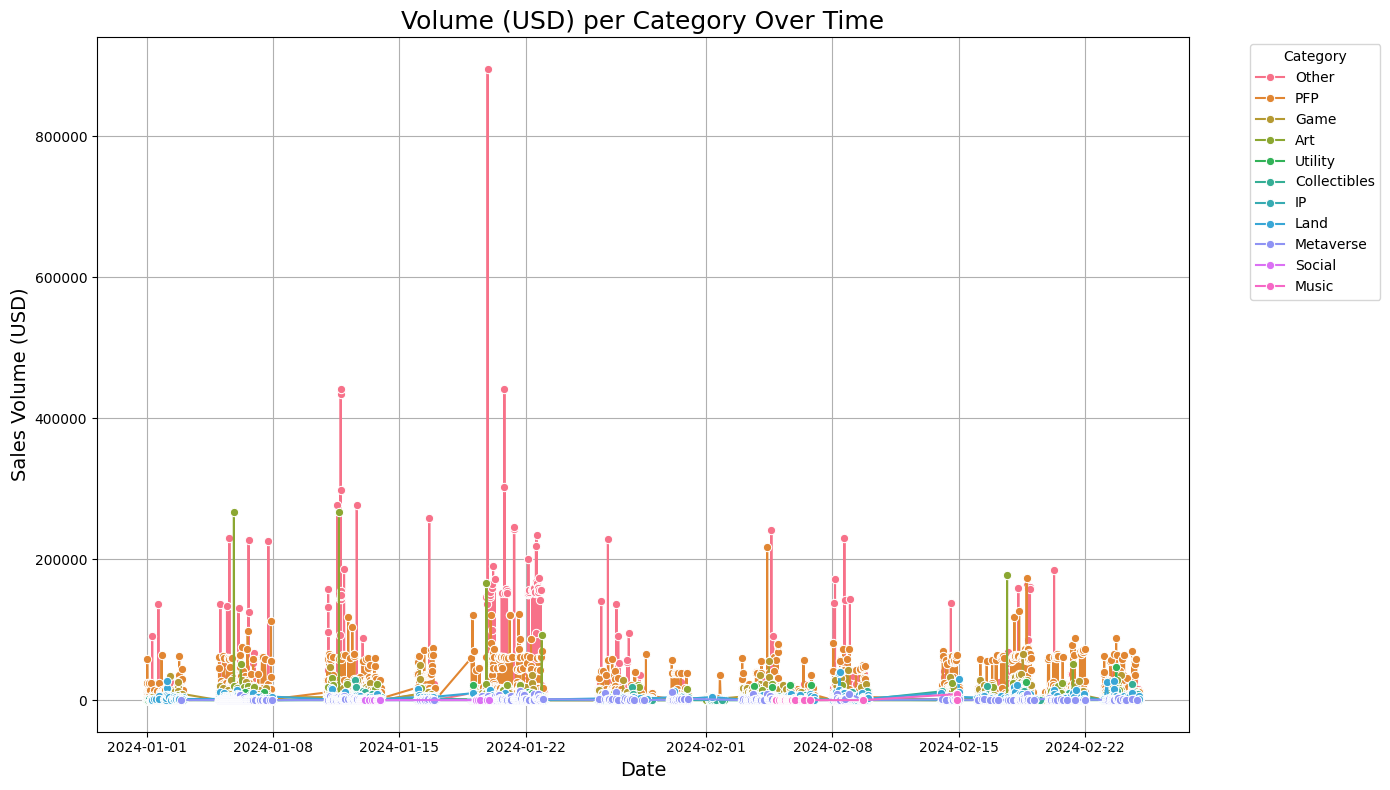

In [66]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_v, x='BLOCK_TIMESTAMP', y='USD', hue='CATEGORY', marker='o')

plt.title('Volume (USD) per Category Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Volume (USD)', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df_v.to_csv('/Users/bahareh/Desktop/My_Job/BlochChain/Git/blockchain-dashboards/02_NFT/part_2_collection_analysis.csv.csv')